In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

black_df = pd.read_csv("BlackFriday.csv")

print("======Data Headers=======")
black_df.head()


======Data Headers=======


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,NaN,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [2]:

print("=====Data Decription=====")
black_df.info()
black_df.describe()



=====Data Decription=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28851 entries, 0 to 28850
Data columns (total 12 columns):
User_ID                       28851 non-null int64
Product_ID                    28851 non-null object
Gender                        28851 non-null object
Age                           28851 non-null object
Occupation                    28851 non-null int64
City_Category                 28740 non-null object
Stay_In_Current_City_Years    28851 non-null object
Marital_Status                28851 non-null int64
Product_Category_1            28851 non-null int64
Product_Category_2            19736 non-null float64
Product_Category_3            8740 non-null float64
Purchase                      28851 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 2.6+ MB


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,2.885100e+04,28851.000000,28851.000000,28851.000000,19736.000000,8740.000000,28851.000000
mean,1.002232e+06,8.353645,0.394198,5.283942,9.874797,12.763272,9258.951856
std,1.282503e+03,6.562941,0.488686,3.733654,5.075192,4.112354,4947.598788
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001137e+06,3.000000,0.000000,1.000000,5.000000,9.000000,5831.000000
50%,1.002131e+06,7.000000,0.000000,5.000000,9.000000,15.000000,8046.000000
75%,1.003412e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12019.500000
max,1.004390e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [3]:
black_df = black_df.drop(['User_ID', 'Product_ID', 'Stay_In_Current_City_Years'], axis=1)
black_df.head()


,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,0,3,NaN,NaN,8370
1,F,0-17,10,A,0,1,6.0,14.0,15200
2,F,0-17,10,A,0,12,NaN,NaN,1422
3,F,0-17,10,NaN,0,12,14.0,NaN,1057
4,M,55+,16,C,0,8,NaN,NaN,7969


In [4]:

black_df["City_Category"] = black_df["City_Category"].fillna("B")
print(black_df["City_Category"])


0        A
1        A
2        A
3        B
4        C
5        A
6        B
7        B
8        B
9        A
10       A
11       B
12       A
13       A
14       A
15       A
16       B
17       A
18       B
19       C
20       B
21       C
22       B
23       C
24       C
25       C
26       C
27       C
28       C
29       B
        ..
28821    B
28822    B
28823    B
28824    B
28825    B
28826    B
28827    B
28828    B
28829    B
28830    B
28831    B
28832    B
28833    B
28834    B
28835    B
28836    B
28837    B
28838    B
28839    B
28840    B
28841    C
28842    C
28843    C
28844    B
28845    B
28846    B
28847    B
28848    B
28849    B
28850    B
Name: City_Category, Length: 28851, dtype: object


In [5]:

black_df["City_Category"] = black_df['City_Category'].map({
    "A": "Metro Cities",
    "B": "Small Towns",
    "C": "Villages"
})

print(black_df.head(10))


  Gender    Age  Occupation City_Category  Marital_Status  Product_Category_1  \
0      F   0-17          10  Metro Cities               0                   3   
1      F   0-17          10  Metro Cities               0                   1   
2      F   0-17          10  Metro Cities               0                  12   
3      F   0-17          10   Small Towns               0                  12   
4      M    55+          16      Villages               0                   8   
5      M  26-35          15  Metro Cities               0                   1   
6      M  46-50           7   Small Towns               1                   1   
7      M  46-50           7   Small Towns               1                   1   
8      M  46-50           7   Small Towns               1                   1   
9      M  26-35          20  Metro Cities               1                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  


In [6]:

black_df["Marital_Status"] = black_df['Marital_Status'].map({
    1: "Married",
    0: "Un-married"
})

print(black_df.head(10))


  Gender    Age  Occupation City_Category Marital_Status  Product_Category_1  \
0      F   0-17          10  Metro Cities     Un-married                   3   
1      F   0-17          10  Metro Cities     Un-married                   1   
2      F   0-17          10  Metro Cities     Un-married                  12   
3      F   0-17          10   Small Towns     Un-married                  12   
4      M    55+          16      Villages     Un-married                   8   
5      M  26-35          15  Metro Cities     Un-married                   1   
6      M  46-50           7   Small Towns        Married                   1   
7      M  46-50           7   Small Towns        Married                   1   
8      M  46-50           7   Small Towns        Married                   1   
9      M  26-35          20  Metro Cities        Married                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1          

In [7]:

black_df.rename(columns={"Product_Category_1":"Baseball Caps","Product_Category_2":"Wine tumblers","Product_Category_3":"Pet Raincoats"},inplace=True)

print(black_df.head(10))



  Gender    Age  Occupation City_Category Marital_Status  Baseball Caps  \
0      F   0-17          10  Metro Cities     Un-married              3   
1      F   0-17          10  Metro Cities     Un-married              1   
2      F   0-17          10  Metro Cities     Un-married             12   
3      F   0-17          10   Small Towns     Un-married             12   
4      M    55+          16      Villages     Un-married              8   
5      M  26-35          15  Metro Cities     Un-married              1   
6      M  46-50           7   Small Towns        Married              1   
7      M  46-50           7   Small Towns        Married              1   
8      M  46-50           7   Small Towns        Married              1   
9      M  26-35          20  Metro Cities        Married              8   

   Wine tumblers  Pet Raincoats  Purchase  
0            NaN            NaN      8370  
1            6.0           14.0     15200  
2            NaN            NaN      1422 

In [8]:
black_df["Wine tumblers"] = black_df["Wine tumblers"].fillna("5")
black_df["Pet Raincoats"] = black_df["Pet Raincoats"].fillna("10")

print(black_df.head(10))



  Gender    Age  Occupation City_Category Marital_Status  Baseball Caps  \
0      F   0-17          10  Metro Cities     Un-married              3   
1      F   0-17          10  Metro Cities     Un-married              1   
2      F   0-17          10  Metro Cities     Un-married             12   
3      F   0-17          10   Small Towns     Un-married             12   
4      M    55+          16      Villages     Un-married              8   
5      M  26-35          15  Metro Cities     Un-married              1   
6      M  46-50           7   Small Towns        Married              1   
7      M  46-50           7   Small Towns        Married              1   
8      M  46-50           7   Small Towns        Married              1   
9      M  26-35          20  Metro Cities        Married              8   

  Wine tumblers Pet Raincoats  Purchase  
0             5            10      8370  
1             6            14     15200  
2             5            10      1422  
3     

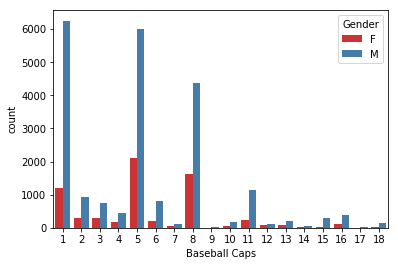

In [10]:
ax = sns.countplot(x="Baseball Caps", hue="Gender", palette="Set1", data=black_df)

plt.show()



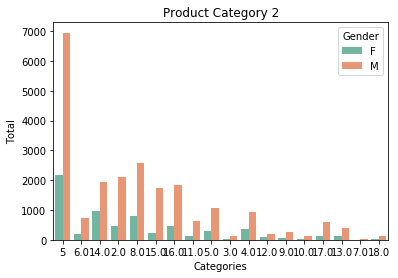

In [11]:
ax = sns.countplot(x="Wine tumblers", hue="Gender", palette="Set2", data=black_df)
ax.set(title="Product Category 2", xlabel="Categories", ylabel="Total")
plt.show()


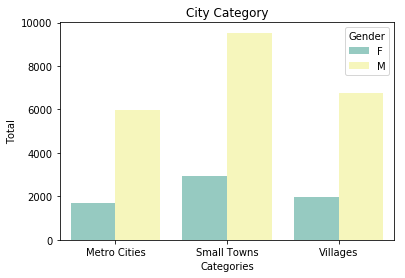

In [12]:

ax = sns.countplot(x="City_Category", hue="Gender", palette="Set3", data=black_df)
ax.set(title="City Category", xlabel="Categories", ylabel="Total")
plt.show()